In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Line Detection

True

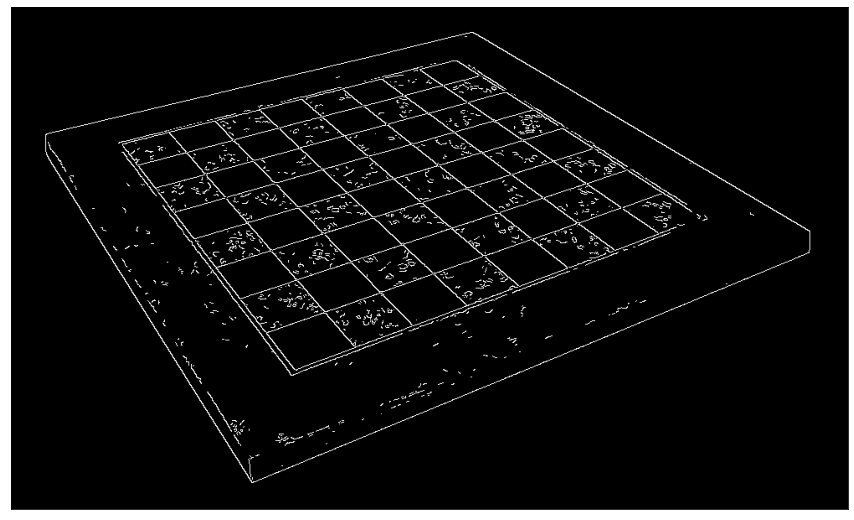

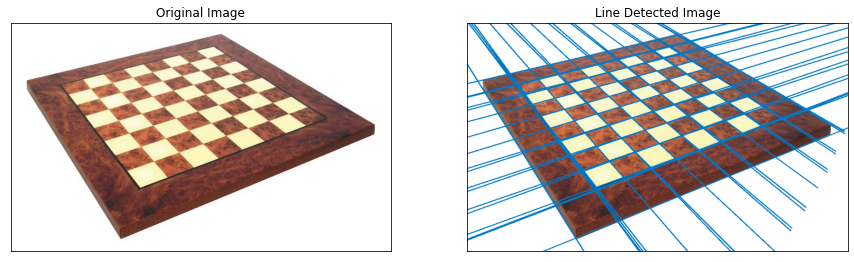

In [2]:
img = cv2.imread('./pics/LineDetection.jpeg')
img2 = img.copy()
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,130,apertureSize = 3)
plt.figure(figsize = (15,15))
plt.imshow(edges, cmap='gray')
plt.xticks([])
plt.yticks([])
threshold = 130;
lines = cv2.HoughLines(edges, 1, np.pi/180.0, threshold)
a, b, c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    p1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    p2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(img2,p1,p2,(200,120,0),2)
plt.figure(figsize = (15,15))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title("Original Image")
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.title("Line Detected Image")
cv2.imwrite('./results/q3/Line1.jpg',img2)

## As you can see, using HoughLines we can detect the board lines of a chess board 

# line Detection of picture Line.jpg

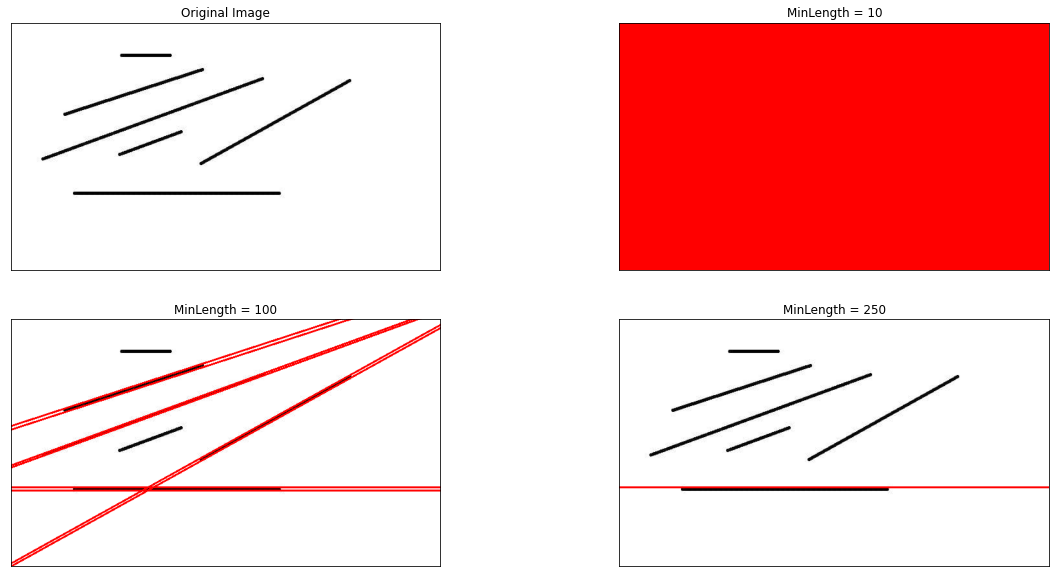

In [3]:
img = cv2.imread('./pics/line.jpg')
img2 = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.figure(figsize = (20, 10))
plt.subplot(221)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title("Original Image")
minlength = [10, 100, 250]
for j in range(0,3):
    img = img2.copy()
    threshold = minlength[j]
    lines = cv2.HoughLines(edges, 1, np.pi/180.0, threshold)
    a, b, c = lines.shape
    for i in range(a):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        p1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        p2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img,p1,p2,(0,0,255),2)
    plt.subplot(2,2,(j+2))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("MinLength = " + str(threshold))
    cv2.imwrite('./results/q3/res3_' + str(threshold) + '.jpg', img)

#### In this part we can see that if we use MinLength = 10, it detects the whole page and gives us a bad result. As we increase the MinLength to 100, the lines must have a much larger minimum to get detected and as a result, we can see that the accuray of line detecting increases significantly. Finally, we increased the MinLenght to 250 and as a result, the code only detects 1 of the lines